In [14]:
#from google.colab import drive
#drive.mount("/content/drive")

In [31]:
#!pip install adjustText
!pip install matplotlib_venn

  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32154 sha256=617a12a1147fdacdd9f83b0ff9046733eda3fa9f53cfe6ad9a64663d57ec1e8e
  Stored in directory: /home/zaki4/.cache/pip/wheels/fb/24/13/4c7b7f4121843c2fc7c5d6b4b1e3ab57be33428997761f996f
Successfully built matplotlib-venn


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sn

#from adjustText import adjust_text # Evite les labels superposés

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib.lines import Line2D
import os


In [17]:
#path = "/content/drive/MyDrive/Projet M2/"
path = "./"

In [18]:
#nbi.publish('victor/nbinteract-image/master', '/content/drive/MyDrive/Projet M2/Script.ipynb')

# Transcripto

In [19]:
def volcano_plot(file, pval, l2FC_up, l2FC_down, label_up, label_down):
    
    data = pd.read_csv(path + f"Transcriptomic/{file}", sep='\t')
    data["-log10"] = -(np.log10(data["padj"]))
    data = pd.DataFrame.dropna(data)
    data["diffexpressed"] = "NO"
    # if log2Foldchange > 2 and pvalue < 0.05, set as "UP" 
    data["diffexpressed"][(data["log2FoldChange"] > l2FC_up) & (data["padj"] < pval)] = "UP"
    # if log2Foldchange < -0.6 and pvalue < 0.05, set as "DOWN"
    data["diffexpressed"][(data["log2FoldChange"] < l2FC_down) & (data["padj"] < pval)] = "DOWN"
    data["diffexpressed"][(data["log2FoldChange"] > -1) & (data["log2FoldChange"] < 1)] = "NONE"
    data["label"] = np.nan
    data["label"][data["diffexpressed"] != "NO"] = data["symbol"][data["diffexpressed"] != "NO"]
    mycolors = []
    labels={'UP': 'red','DOWN':'blue','NO':'grey'}
    for i in data['diffexpressed']:
        if i == 'NONE':
            mycolors.append('white')
        elif i == 'UP':
            mycolors.append('red')
        elif i == 'DOWN':
            mycolors.append('blue')
        elif i == "NO":
            mycolors.append('grey')
    
    fig, ax = plt.subplots(figsize=(15,10))

    x = data['log2FoldChange']
    y = data['-log10']
    n = data["symbol"]
    texte = []

    ax.scatter(x, y, c=mycolors)

    for i, txt in enumerate(n):
        if (x.iloc[i] > label_up and y.iloc[i] > label_up) or (x.iloc[i] < label_down and y.iloc[i] > label_up):
            texte += [ax.text(x.iloc[i], y.iloc[i],txt)]

    ax.set_xlabel("log2FoldChange",fontsize=22)
    ax.set_ylabel("-log10",fontsize=22)
    legend_elements = [Line2D([0], [0], marker='o',color='w', label='UP',markerfacecolor='red', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Down',markerfacecolor='blue', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='NO',markerfacecolor='grey', markersize=15)]
    ax.legend(handles=legend_elements, title="Expression", loc="upper left")
    #adjust_text(texte)
    return plt.show() 


In [20]:
element = os.listdir(path + "Transcriptomic/")
file = []
for elm in element:
    if elm.endswith(".txt"):
        file.append(elm)
interact(volcano_plot,file=file, pval =(-0.5,0.5,0.05), l2FC_up=(1,10,0.5), l2FC_down=(-10,-1,0.5), 
         label_up=(5,10,1), label_down=(-10,-1,1))

interactive(children=(Dropdown(description='file', options=('all_de_j2_vs_j0_allgenes.txt', 'all_de_j4_vs_j0_a…

<function __main__.volcano_plot(file, pval, l2FC_up, l2FC_down, label_up, label_down)>

# Proteo

In [21]:
def volcano_plot_prot(file,  pval, l2FC_up, l2FC_down):
    
    data = pd.read_csv(path + f"Proteomique/{file}", sep='\t', skiprows=1)
    data["-log10"] = -(np.log10(data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"]))
    #data = pd.DataFrame.dropna(data)
    data["diffexpressed"] = "NO"
    # if log2Foldchange > 2 and pvalue < 0.05, set as "UP" 
    data["diffexpressed"][(data["Abundance Ratio (log2): (T48h) / (T0)"] > l2FC_up) & (data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"] < pval)] = "UP"
    # if log2Foldchange < -0.6 and pvalue < 0.05, set as "DOWN"
    data["diffexpressed"][(data["Abundance Ratio (log2): (T48h) / (T0)"] < l2FC_down) & (data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"] < pval)] = "DOWN"
    data["diffexpressed"][(data["Abundance Ratio (log2): (T48h) / (T0)"] > -1) & (data["Abundance Ratio (log2): (T48h) / (T0)"] < 1)] = "NONE"
    data["label"] = np.nan
    data["label"][data["diffexpressed"] != "NO"] = data["Gene Symbol"][data["diffexpressed"] != "NO"]
    mycolors = []

    for i in data['diffexpressed']:
        if i == 'NONE':
            mycolors.append('grey')
        elif i == 'UP':
            mycolors.append('red')
        elif i == 'DOWN':
            mycolors.append('blue')
        elif i == "NO":
            mycolors.append('grey')

    fig, ax = plt.subplots(figsize=(15,10))

    x = data['Abundance Ratio (log2): (T48h) / (T0)']
    y = data['-log10']
    n = data["Gene Symbol"]
    texte = []

    ax.scatter(x, y, c=mycolors)

    for i, txt in enumerate(n):
        if (x.iloc[i] > 2 and y.iloc[i] > 2) or (x.iloc[i] < -2 and y.iloc[i] > 2):
            texte += [ax.text(x.iloc[i], y.iloc[i],txt)]

    ax.set_xlabel("log2FoldChange",fontsize=22)
    ax.set_ylabel("-log10",fontsize=22)
    legend_elements = [Line2D([0], [0], marker='o',color='w', label='UP',markerfacecolor='red', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Down',markerfacecolor='blue', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='NO',markerfacecolor='grey', markersize=15)]
    ax.legend(handles=legend_elements, title="Expression", loc="upper left")
    #adjust_text(texte)
    return plt.show()

In [22]:
element = os.listdir(path + "Proteomique/")

file = []
for elm in element:
  print(elm)
  if elm.endswith(".txt"):
    file.append(elm)
interact(volcano_plot_prot,file=file, pval =(-0.5,0.5,0.05), l2FC_up=(1,10,0.5), l2FC_down=(-10,-1,0.5))

Experience1.txt
Experience2.txt
Experience_1
Experience_2


interactive(children=(Dropdown(description='file', options=('Experience1.txt', 'Experience2.txt'), value='Expe…

<function __main__.volcano_plot_prot(file, pval, l2FC_up, l2FC_down)>

In [23]:
prot_data = pd.read_csv(path+"Proteomique/Experience1.txt", sep='\t', skiprows=1)
prot_data.iloc[:,[2,3,21,30,31,32,36,37,38]].sort_values(by=['Abundance Ratio (log2): (T48h) / (T0)'])

,Accession,Description,Gene Symbol,Abundance Ratio (log2): (T48h) / (T0),Abundance Ratio (log2): (T96h) / (T0),Abundance Ratio (log2): (T96h) / (T48h),Abundance Ratio Adj. P-Value: (T48h) / (T0),Abundance Ratio Adj. P-Value: (T96h) / (T0),Abundance Ratio Adj. P-Value: (T96h) / (T48h)
1585,Q5SYB0,FERM and PDZ domain-containing protein 1 OS=Ho...,FRMPD1,-2.17,-2.46,-0.32,1.410630e-15,0.000342,0.991557
357,P22352,Glutathione peroxidase 3 OS=Homo sapiens OX=96...,GPX3,-1.93,-2.31,-0.41,1.410630e-15,0.000958,0.964612
50,P01031,Complement C5 OS=Homo sapiens OX=9606 GN=C5 PE...,C5,-1.64,-1.45,0.17,5.607040e-11,0.100866,0.948476
336,Q9BXR6,Complement factor H-related protein 5 OS=Homo ...,CFHR5,-1.64,-1.64,-0.04,5.637270e-11,0.046413,0.991557
1614,Q9NVG8,TBC1 domain family member 13 OS=Homo sapiens O...,TBC1D13,-1.63,-1.02,0.54,1.233610e-12,0.396246,0.482357
...,...,...,...,...,...,...,...,...,...
1635,Q9BXS5,AP-1 complex subunit mu-1 OS=Homo sapiens OX=9...,AP1M1,NaN,NaN,NaN,NaN,NaN,NaN
1638,Q8N9N7,Leucine-rich repeat-containing protein 57 OS=H...,LRRC57,NaN,NaN,NaN,NaN,NaN,NaN
1644,O75792,Ribonuclease H2 subunit A OS=Homo sapiens OX=9...,RNASEH2A,NaN,NaN,NaN,NaN,NaN,NaN
1655,Q99747,Gamma-soluble NSF attachment protein OS=Homo s...,NAPG,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data = prot_data

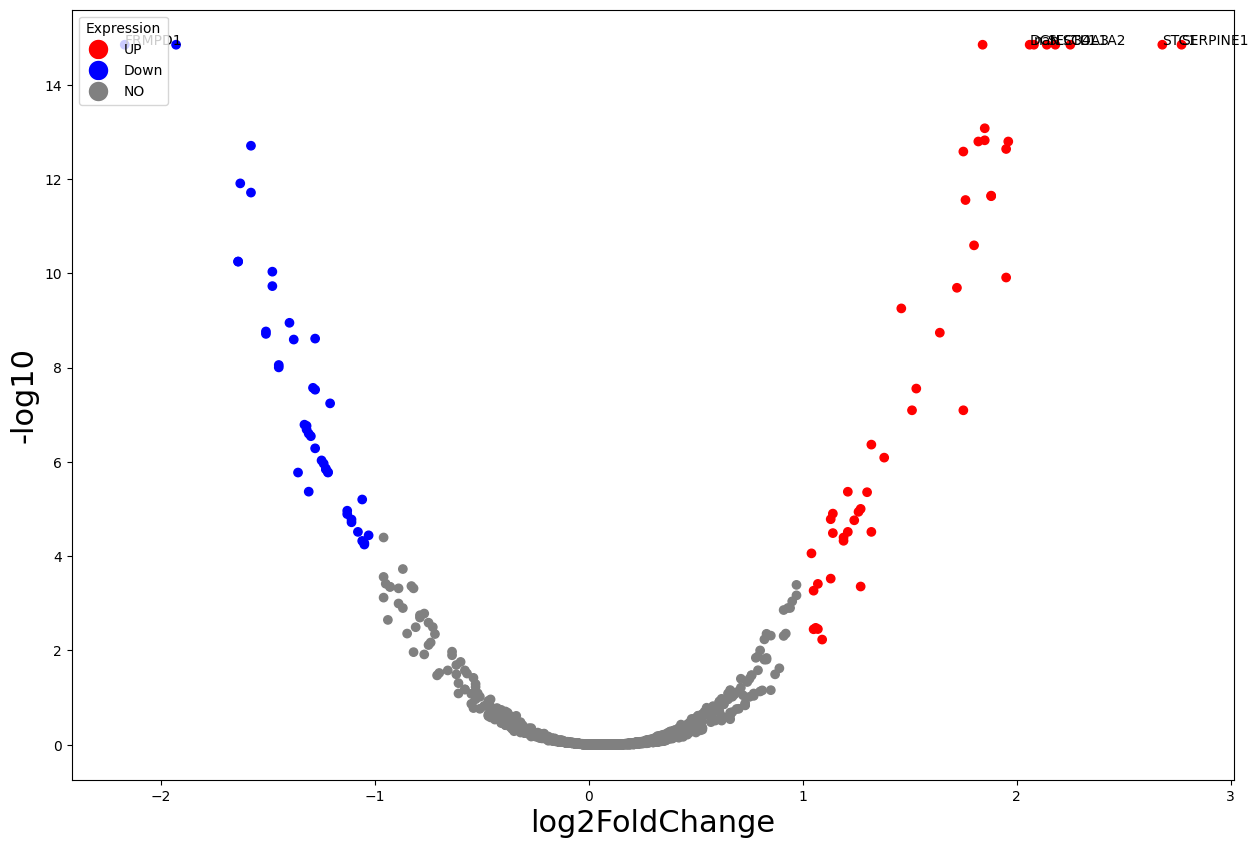

In [25]:
data["-log10"] = -(np.log10(data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"]))
#data = pd.DataFrame.dropna(data)
data["diffexpressed"] = "NO"
# if log2Foldchange > 2 and pvalue < 0.05, set as "UP" 
data["diffexpressed"][(data["Abundance Ratio (log2): (T48h) / (T0)"] > 1) & (data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"] < 0.05)] = "UP"
# if log2Foldchange < -0.6 and pvalue < 0.05, set as "DOWN"
data["diffexpressed"][(data["Abundance Ratio (log2): (T48h) / (T0)"] < -1) & (data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"] < 0.05)] = "DOWN"
data["diffexpressed"][(data["Abundance Ratio (log2): (T48h) / (T0)"] > -1) & (data["Abundance Ratio (log2): (T48h) / (T0)"] < 1)] = "NONE"
data["label"] = np.nan
data["label"][data["diffexpressed"] != "NO"] = data["Gene Symbol"][data["diffexpressed"] != "NO"]
mycolors = []

for i in data['diffexpressed']:
    if i == 'NONE':
        mycolors.append('grey')
    elif i == 'UP':
        mycolors.append('red')
    elif i == 'DOWN':
        mycolors.append('blue')
    elif i == "NO":
        mycolors.append('grey')

fig, ax = plt.subplots(figsize=(15,10))

x = data['Abundance Ratio (log2): (T48h) / (T0)']
y = data['-log10']
n = data["Gene Symbol"]
texte = []

ax.scatter(x, y, c=mycolors)

for i, txt in enumerate(n):
    if (x.iloc[i] > 2 and y.iloc[i] > 2) or (x.iloc[i] < -2 and y.iloc[i] > 2):
        texte += [ax.text(x.iloc[i], y.iloc[i],txt)]

ax.set_xlabel("log2FoldChange",fontsize=22)
ax.set_ylabel("-log10",fontsize=22)
legend_elements = [Line2D([0], [0], marker='o',color='w', label='UP',markerfacecolor='red', markersize=15),
               Line2D([0], [0], marker='o', color='w', label='Down',markerfacecolor='blue', markersize=15),
               Line2D([0], [0], marker='o', color='w', label='NO',markerfacecolor='grey', markersize=15)]
ax.legend(handles=legend_elements, title="Expression", loc="upper left")
#adjust_text(texte)
plt.show()

In [26]:
#pour ne choisir que les up ou down
prot_data = prot_data[(prot_data["Abundance Ratio (log2): (T96h) / (T48h)"] > 0)]

In [27]:
de_1_0 = set(prot_data[prot_data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"] < 0.05]["Gene Symbol"].dropna())
de_2_1 = set(prot_data[prot_data["Abundance Ratio Adj. P-Value: (T96h) / (T48h)"] < 0.05]["Gene Symbol"].dropna())
de_2_0 = set(prot_data[prot_data["Abundance Ratio Adj. P-Value: (T96h) / (T0)"] < 0.05]["Gene Symbol"].dropna())

In [28]:
de_1_0

{'A2M',
 'ANXA1',
 'APP',
 'AVEN',
 'C19orf10; MYDGF',
 'C1QB',
 'C1R',
 'C1S',
 'C4BPA',
 'C5',
 'CD109',
 'CD9',
 'CFH',
 'COL12A1',
 'COL4A2',
 'COL6A3',
 'COL7A1',
 'CST3',
 'DNAJB11',
 'EFEMP1',
 'F13A1',
 'F2',
 'FBN2',
 'HIST1H1B',
 'HIST1H1C',
 'HMGCS1',
 'HNRNPL',
 'HRG',
 'HSPG2',
 'HTRA1',
 'IFNE',
 'IGHG1',
 'IGHV1OR15-1',
 'IGHV3-7',
 'IGJ; JCHAIN',
 'IGKC',
 'IGLL5',
 'LGALS3BP',
 'MYH11',
 'NLN',
 'PCOLCE',
 'PLOD1',
 'PMPCB',
 'PRSS1',
 'PTX3',
 'QDPR',
 'RANGAP1',
 'SERPINA3',
 'SERPINF1',
 'SF1',
 'SLC34A3',
 'TBC1D13',
 'TGFBI',
 'TIMP2',
 'TNC',
 'TTLL12',
 'VWF'}

In [33]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [34]:
inter4 = de_1_0.intersection(de_2_1.intersection(de_2_0))

diff1 = de_1_0 - de_2_1 - de_2_0
diff2 = de_2_1 - de_1_0 - de_2_0
diff3 = de_2_0 - de_2_1 - de_1_0

inter1 = de_1_0.intersection(de_2_1)
inter2 = de_2_1.intersection(de_2_0)
inter3 = de_2_0.intersection(de_1_0)


/home/zaki4/.local/lib/python3.8/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


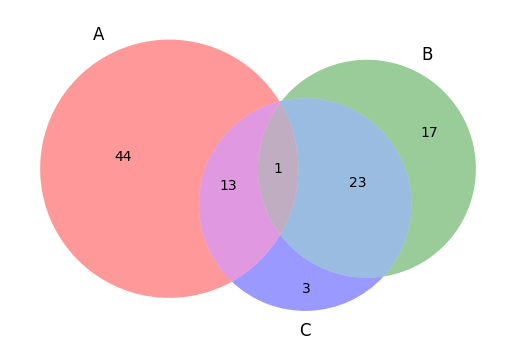

In [35]:
venn3(subsets = (len(diff1), len(diff2), len(inter1), len(diff3), len(inter3), len(inter2), len(inter4)))
plt.show()

Text(0.5, 1.0, 'Venn Diagram')

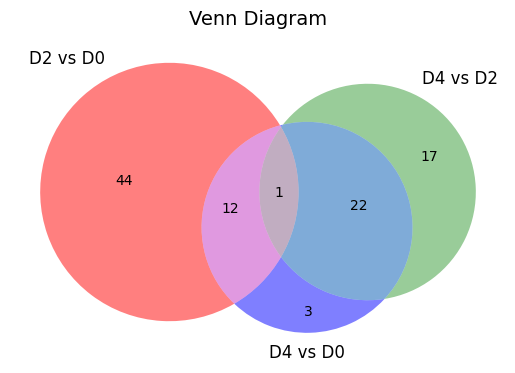

In [36]:
vd = venn3([de_1_0, de_2_1 , de_2_0],set_labels=("D2 vs D0","D4 vs D2","D4 vs D0"))
vd.get_patch_by_id("100").set_alpha(0.5)
vd.get_patch_by_id("001").set_alpha(0.5)
vd.get_patch_by_id("011").set_alpha(0.5)

plt.title("Venn Diagram",fontsize=14)

Text(0.5, 1.0, 'Venn Diagram')

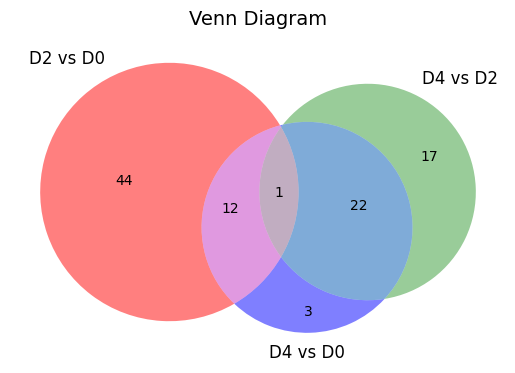

In [37]:
vd = venn3([de_1_0, de_2_1 , de_2_0],set_labels=("D2 vs D0","D4 vs D2","D4 vs D0"))
vd.get_patch_by_id("100").set_alpha(0.5)
vd.get_patch_by_id("001").set_alpha(0.5)
vd.get_patch_by_id("011").set_alpha(0.5)

plt.title("Venn Diagram",fontsize=14)

Text(0.5, 1.0, 'Venn Diagram')

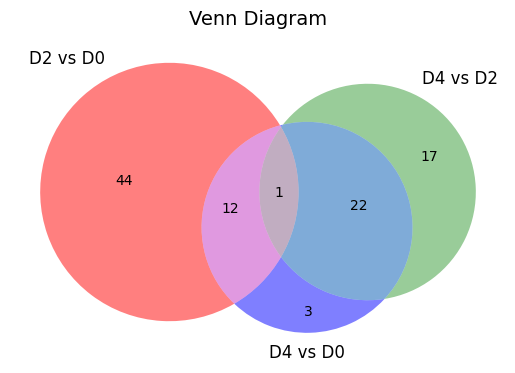

In [38]:
vd = venn3([de_1_0, de_2_1 , de_2_0],set_labels=("D2 vs D0","D4 vs D2","D4 vs D0"))
vd.get_patch_by_id("100").set_alpha(0.5)
vd.get_patch_by_id("001").set_alpha(0.5)
vd.get_patch_by_id("011").set_alpha(0.5)

plt.title("Venn Diagram",fontsize=14)